In [ ]:
!pip install -q torch torchvision torchaudio transformers datasets torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image
import requests

id2label = {
    0: "Infiltration",
    1: "Atelectasis",
    2: "Cardiomegaly",
    3: "Pleural effusion",
    4: "Pneumothorax",
    5: "Nodule/Mass",
}

label2id = {v: k for k, v in id2label.items()}

In [ ]:
from transformers import AutoModelForObjectDetection
'''
model = AutoModelForObjectDetection.from_pretrained(
    "facebook/detr-resnet-50",
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
)
'''
!unzip detr_nih.zip

model = AutoModelForObjectDetection.from_pretrained(
    "/content/detr_nih",
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
    )


processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")

Archive:  detr_nih.zip
replace detr_nih/training_args.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: detr_nih/training_args.bin  
replace detr_nih/preprocessor_config.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: detr_nih/preprocessor_config.json  
replace detr_nih/model.safetensors? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: detr_nih/model.safetensors  
replace detr_nih/config.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: detr_nih/config.json    


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

inputs = processor(images=image, return_tensors="pt").to(device)
outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.2)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected Nodule/Mass with confidence 0.205 at location [148.02, 184.43, 288.74, 304.28]


In [ ]:
outputs.keys()

odict_keys(['logits', 'pred_boxes', 'last_hidden_state', 'encoder_last_hidden_state'])

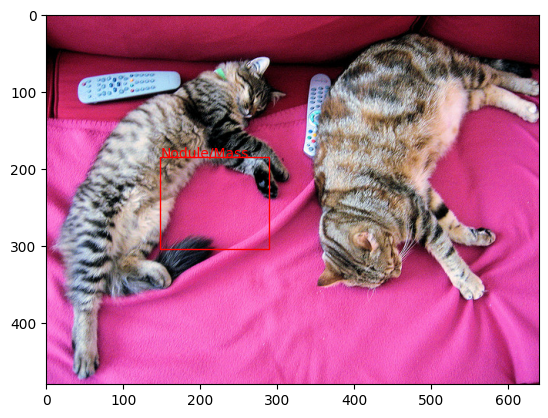

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.imshow(image)

ax = plt.gca() 

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()] 

    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                            linewidth=1, edgecolor='r', facecolor='none')

    ax.add_patch(rect)
    ax.text(box[0], box[1], model.config.id2label[label.item()], color='r')

plt.show()

In [ ]:
!kaggle datasets download zfturbo/nih-chest-xray-dataset-bbox-for-vinbigdata
!unzip nih-chest-xray-dataset-bbox-for-vinbigdata.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/zfturbo/nih-chest-xray-dataset-bbox-for-vinbigdata
License(s): unknown
 99% 302M/304M [00:17<00:00, 23.0MB/s]
100% 304M/304M [00:17<00:00, 18.3MB/s]
Archive:  nih-chest-xray-dataset-bbox-for-vinbigdata.zip
  inflating: data/nih.csv            
  inflating: data/nih/00000032_037.png  
  inflating: data/nih/00000072_000.png  
  inflating: data/nih/00000147_001.png  
  inflating: data/nih/00000149_006.png  
  inflating: data/nih/00000181_061.png  
  inflating: data/nih/00000211_010.png  
  inflating: data/nih/00000211_016.png  
  inflating: data/nih/00000211_019.png  
  inflating: data/nih/00000211_041.png  
  inflating: data/nih/00000344_003.png  
  inflating: data/nih/00000377_004.png  
  inflating: data/nih/00000398_003.png  
  inflating: data/nih/00000457_004.png  
  inflating: data/nih/00000468_017.png  
  inflating: data/nih/00000468_033.png  
  inflating: data/nih/00000468_041.png  
  inflating: data/nih/00000583_008.png  
  inflating: d

In [ ]:
import os
import json
import pandas as pd

def nih_csv_to_coco(csv_path, image_dir, output_json):

  df = pd.read_csv(csv_path)

  images = []
  annotations = []
  categories = []
  category_id = 0  # Kategoriler için başlangıç ID'si
  annotation_id = 0 # Açıklamalar için başlangıç ID'si

  for index, row in df.iterrows():
    image_id = row['image_id']

    image_name = f"{image_id}.png"  # Resim dosya adını varsayıyoruz

    image_id = int(image_id.replace("_", ""))

    images.append({
        "id": image_id,
        "file_name": image_name,
        "width": 1024,  #row['width'],
        "height": 1024, #row['height'],
    })

    category_name = row['class_name']
    if category_name not in [c["name"] for c in categories]:
      categories.append({
          "id": category_id,
          "name": category_name,
          "supercategory": "nih",  
      })
      category_id += 1

    category_id_for_obj = next(c["id"] for c in categories if c["name"] == category_name)

    annotations.append({
        "id": annotation_id,
        "image_id": image_id,
        "category_id": category_id_for_obj,
        "segmentation": [],
        "bbox": [row['x_min'], row['y_min'], row['x_max'] - row['x_min'], row['y_max'] - row['y_min']],  # COCO formatında [x, y, width, height]
        "iscrowd": 0,  # Kalabalık nesneler için 1, aksi takdirde 0
        "area": (row['x_max'] - row['x_min']) * (row['y_max'] - row['y_min']),  # Sınırlayıcı kutunun alanı
    })
    annotation_id += 1

  coco_data = {
      "info": {
          "description": "NIH Chest X-ray Dataset",
          "url": None,
          "version": "1.0",
          "year": 2023,
          "contributor": "User",
      },
      "images": images,
      "annotations": annotations,
      "categories": categories,
  }

  with open(output_json, "w") as f:
    json.dump(coco_data, f)

  print(f"COCO verileri {output_json} dosyasına kaydedildi.")

In [ ]:
csv_path = "/content/data/nih.csv"  
image_dir = "/content/data/nih"  
output_json = "nih_coco.json" 

nih_csv_to_coco(csv_path, image_dir, output_json)

COCO verileri nih_coco.json dosyasına kaydedildi.


In [ ]:
!pip install -q pycocotools

In [ ]:
from pycocotools.coco import COCO

coco = COCO("nih_coco.json")  

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
annIds = coco.getAnnIds()
anns = coco.loadAnns(annIds)

In [ ]:
from transformers import Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
from pycocotools.coco import COCO
import torch
import os
from PIL import Image
import numpy as np
import albumentations as A
import cv2
from torch.utils.data import random_split
"""
transform = A.Compose(
    [
        A.RandomBrightnessContrast(p=0.5, brightness_limit=0.2, contrast_limit=0.2),
        A.HueSaturationValue(p=0.5, hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20),
        A.GaussianBlur(p=0.5, blur_limit=(3, 7)),
        A.HorizontalFlip(p=0.5),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['class_labels'], min_visibility=0.1) #min_visibility added
)
"""
# NIH veri seti için Dataset sınıfı
class NIHDataset(Dataset):
    def __init__(self, annotation_file, image_dir, processor):
        self.coco = COCO(annotation_file)
        self.image_dir = image_dir
        self.processor = processor
        self.image_ids = self.coco.getImgIds()

        '''
        all_image_ids = self.coco.getImgIds()

        train_size = int(split_ratio * len(all_image_ids))
        val_size = len(all_image_ids) - train_size

        train_indices, val_indices = random_split(range(len(all_image_ids)), [train_size, val_size], generator=torch.Generator().manual_seed(42))

        if self.is_train:
            self.image_ids = [all_image_ids[i] for i in train_indices]
        else:
            self.image_ids = [all_image_ids[i] for i in val_indices]
        '''
    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_info = self.coco.loadImgs(image_id)
        image_path = os.path.join(self.image_dir, image_info[0]['file_name'])
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)[:, :, ::-1]
        annotations = self.coco.loadAnns(self.coco.getAnnIds(image_id))
        '''
        original_image = image.copy()
        original_annotations = annotations.copy()

        if self.transform:
            transformed = self.transform(image = image,
                                         bboxes=[a['bbox'] for a in annotations],
                                         class_labels = [a['category_id'] for a in annotations])

            bboxes_contain_nan = any(np.any(np.isnan(bbox)) for bbox in transformed['bboxes'])

            if bboxes_contain_nan:
                image = original_image
                annotations = original_annotations
            else:
                for i in range(len(annotations)):
                    annotations[i]['bbox'] = transformed['bboxes'][i]
                image = transformed['image']
        '''
        targets = {
            'image_id': torch.tensor([image_id]),
            'annotations': annotations,
        }

        # Hugging Face Transformers için girdi formatı
        inputs = self.processor(images=image, annotations=targets, return_tensors="pt").to(device)

        return inputs


In [ ]:
dataset = NIHDataset(annotation_file="nih_coco.json", image_dir="/content/data/nih", processor=processor)

train_size = int(0.8 * len(dataset)) 
val_size = len(dataset) - train_size  

train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
def collate_fn(batch):
    pixel_values = [item["pixel_values"].squeeze(0).cpu() for item in batch]
    encoding = processor.pad(pixel_values, return_tensors="pt")
    labels = [item["labels"][0] for item in batch]

    batch = {}
    batch["pixel_values"] = encoding["pixel_values"].to(device)
    batch["pixel_mask"] = encoding["pixel_mask"].to(device)
    batch["labels"] = labels

    return batch

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=20,
    fp16=True,
    save_steps=100,
    logging_steps=100,
    learning_rate=1e-5,
    weight_decay=1e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    report_to="none",
    dataloader_pin_memory=False,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=collate_fn,
    tokenizer=processor,
)

trainer.train()


<ipython-input-20-8e30a73afe9b>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,1.985400,1.976321
2,2.005800,1.977833
3,1.913300,1.973189
4,1.925600,1.964670
5,1.909500,1.919557
6,1.772200,1.880153
7,1.829500,1.889991
8,1.836600,1.875860
9,1.674700,1.909901
10,1.731700,1.911859


Epoch,Training Loss,Validation Loss
1,1.985400,1.976321
2,2.005800,1.977833
3,1.913300,1.973189
4,1.925600,1.964670
5,1.909500,1.919557
6,1.772200,1.880153
7,1.829500,1.889991
8,1.836600,1.875860
9,1.674700,1.909901
10,1.731700,1.911859


TrainOutput(global_step=12520, training_loss=1.7644035470371429, metrics={'train_runtime': 4054.5653, 'train_samples_per_second': 3.088, 'train_steps_per_second': 3.088, 'total_flos': 5.9822908872192e+18, 'train_loss': 1.7644035470371429, 'epoch': 20.0})

In [ ]:
image = Image.open("/content/data/nih/00021009_001.png").convert("RGB")
inputs = processor(images=image, return_tensors="pt").to(device)
outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.1)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected Cardiomegaly with confidence 0.242 at location [233.2, 393.35, 459.43, 648.48]


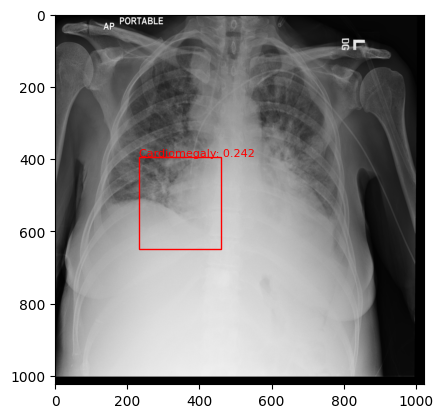

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def showBoxesResult(image, results):
    plt.imshow(image)

    ax = plt.gca() 

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()] 

        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                            linewidth=1, edgecolor='r', facecolor='none')

        ax.add_patch(rect)
        class_name = model.config.id2label[label.item()]
        probabilty = round(score.item(), 3)
        text = f"{class_name}: {probabilty}"
        ax.text(box[0], box[1], text, color='r', fontsize=8)

    plt.show()

showBoxesResult(image, results)

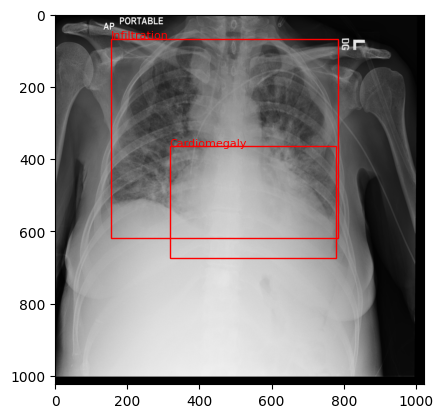

In [ ]:
def showBoxesFromId(image, id):
    plt.imshow(image)

    ax = plt.gca() 
    info = coco.loadAnns(coco.getAnnIds(imgIds=id))

    for infos in info:
        box = infos['bbox']
        rect = patches.Rectangle((box[0], box[1]), box[2] , box[3],
                            linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        class_name = coco.cats[infos['category_id']]['name']
        ax.text(box[0], box[1], class_name, color='r', fontsize=8)

    plt.show()

showBoxesFromId(image, 21009001)

In [ ]:
trainer.save_model("./detr_nih")

In [ ]:
!zip -r detr_nih.zip detr_nih/

  adding: detr_nih/ (stored 0%)
  adding: detr_nih/config.json (deflated 61%)
  adding: detr_nih/preprocessor_config.json (deflated 48%)
  adding: detr_nih/model.safetensors (deflated 7%)
  adding: detr_nih/training_args.bin (deflated 51%)


In [ ]:
from google.colab import files
files.download('/content/detr_nih.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip detr_nih.zip

Archive:  detr_nih.zip
  inflating: detr_nih/model.safetensors  
  inflating: detr_nih/config.json    
  inflating: detr_nih/preprocessor_config.json  
  inflating: detr_nih/training_args.bin  


In [ ]:
model = AutoModelForObjectDetection.from_pretrained(
    "/content/detr_nih",
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
    ).to(device)